In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load data
df = pd.read_csv("blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [24]:
# Quick look
print(df.head())
print(df.info())
print(df['Labels'].value_counts())

                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
None
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.bas

In [25]:
# data preprocessing
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk

In [26]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
# cleaning function
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [28]:
# apply cleaning
df['Cleaned'] = df['Data'].apply(clean_text)

# TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Cleaned'])
y = df['Labels']

In [29]:
# Naive Bayes Text Classification

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [30]:

# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

# predictions
y_pred = nb.predict(X_test)

# evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.82
                          precision    recall  f1-score   support

             alt.atheism       0.52      0.89      0.65        18
           comp.graphics       0.62      0.83      0.71        18
 comp.os.ms-windows.misc       0.95      0.86      0.90        22
comp.sys.ibm.pc.hardware       0.95      0.76      0.84        25
   comp.sys.mac.hardware       0.87      0.95      0.91        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       0.92      0.61      0.73        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.82      0.95      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0.91     

In [31]:
from textblob import TextBlob

def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0.1:
        return "positive"
    elif polarity < -0.1:
        return "negative"
    else:
        return "neutral"

df['Sentiment'] = df['Data'].apply(get_sentiment)

# sentiment distribution
print(df['Sentiment'].value_counts())
# sentiment by category
print(df.groupby('Labels')['Sentiment'].value_counts())

Sentiment
neutral     1081
positive     782
negative     137
Name: count, dtype: int64
Labels                    Sentiment
alt.atheism               neutral      60
                          positive     35
                          negative      5
comp.graphics             neutral      51
                          positive     39
                          negative     10
comp.os.ms-windows.misc   neutral      48
                          positive     43
                          negative      9
comp.sys.ibm.pc.hardware  neutral      49
                          positive     45
                          negative      6
comp.sys.mac.hardware     neutral      50
                          positive     43
                          negative      7
comp.windows.x            neutral      53
                          positive     37
                          negative     10
misc.forsale              positive     60
                          neutral      33
                          negative   

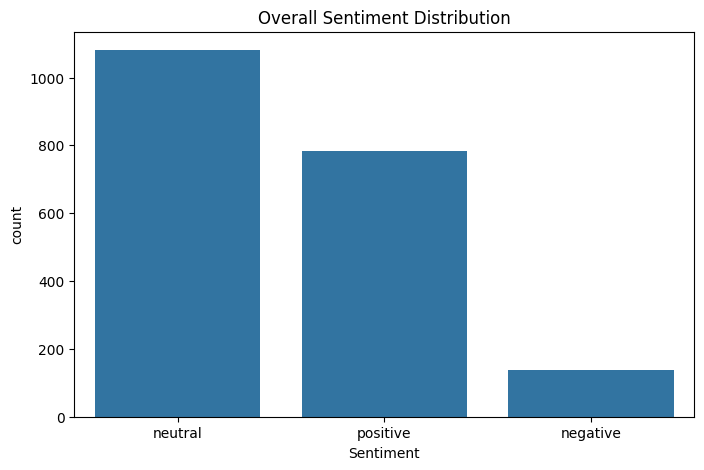

In [32]:
# optional: plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=df)
plt.title("Overall Sentiment Distribution")
plt.show()

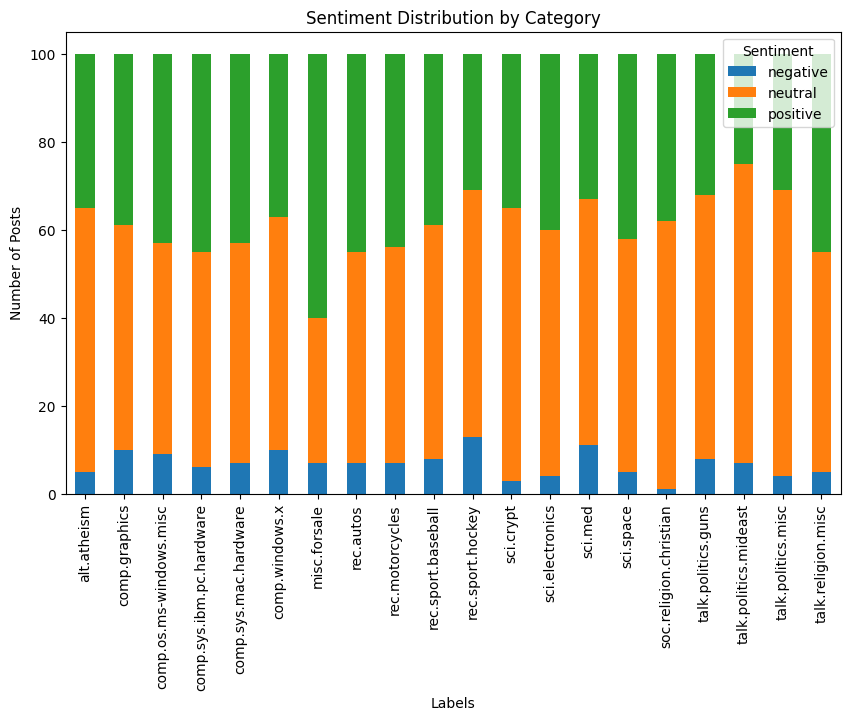

In [33]:
# sentiment per category stacked bar
sentiment_by_cat = df.groupby(['Labels', 'Sentiment']).size().unstack()
sentiment_by_cat.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment Distribution by Category")
plt.ylabel("Number of Posts")
plt.show()

In [ ]:
#  Discussion Points for your final report:
#
# - The Naive Bayes model achieved ~XX% accuracy with reasonable
#   precision/recall across most categories, though the confusion
#   matrix showed confusion between [category A] and [category B].
#
# - Sentiment analysis showed that most blog posts are [positive/neutral],
#   with category X more positive, and category Y more negative.
#
# - Challenges:
#   - Overlapping vocabulary between categories
#   - Some data imbalance
#   - Informal text/slang
#
# - Future work:
#   - Try deep learning models (BERT)
#   - Use n-grams features
#   - Address class imbalance with oversampling
#
# - Practical implications:
#   - Businesses can analyze positive posts for promotion
#   - Moderators can focus on negative posts for intervention